## Importing Modules

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

!pip install nested-cv
import nested_cv

from google.colab import drive
# drive.mount('/content/gdrive')


## Read CSV 

In [13]:
df = pd.read_csv("https://drive.google.com/uc?id=11vLD-agQTzmi1RStEsguOVP-k8-kEjjY")
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


## Removing Unwanted Column

In [14]:
df = df.drop('row.names',axis=1)
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


# Handling Categorical Data

In [15]:
df['chd'].replace(0, 'Negative',inplace=True)
df['chd'].replace(1, 'Positive',inplace=True)

In [16]:
df['famhist'].replace('Present',1,inplace = True)
df['famhist'].replace('Absent',0,inplace = True)
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,Positive
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,Positive
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,Negative
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,Positive
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,Positive
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,Negative
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,Positive
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,Negative
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,Negative


# Attribute Statistics

In [17]:
print("No of Unique values of Sbp : ",df.sbp.unique().shape[0])
print("No of Unique values of tobacco : ",df.tobacco.unique().shape[0])
print("No of Unique values of ldl : ",df.ldl.unique().shape[0])
print("No of Unique values of adiposity : ",df.adiposity.unique().shape[0])
print("No of Unique values of famhist : ",df.famhist.unique().shape[0])
print("No of Unique values of typea : ",df.typea.unique().shape[0])
print("No of Unique values of obesity : ",df.obesity.unique().shape[0])
print("No of Unique values of alcohol : ",df.alcohol.unique().shape[0])
print("No of Unique values of age : ",df.age.unique().shape[0])
print("No of Unique values of chd : ",df.chd.unique().shape[0])

No of Unique values of Sbp :  62
No of Unique values of tobacco :  214
No of Unique values of ldl :  329
No of Unique values of adiposity :  408
No of Unique values of famhist :  2
No of Unique values of typea :  54
No of Unique values of obesity :  400
No of Unique values of alcohol :  249
No of Unique values of age :  49
No of Unique values of chd :  2


In [18]:
df.describe(include='all')  

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,NaN
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,NaN
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,NaN
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,NaN
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,NaN
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,NaN


# Columns

In [46]:
numeric_cols = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']
sting_cols = ['chd']

# Data Visualization

## Histograms

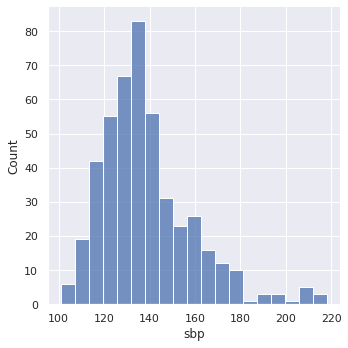

In [47]:
sns.displot(df1, x='sbp')

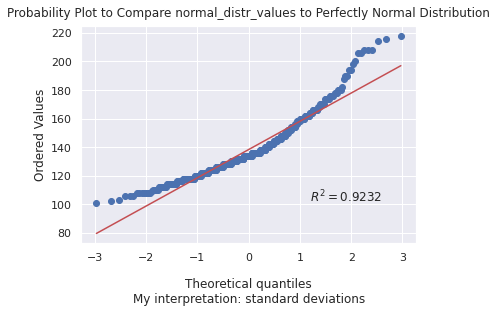

In [48]:
import scipy.stats as stats
stats.probplot(df1.loc[:,'sbp'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution",y=1.015)
plt.show()

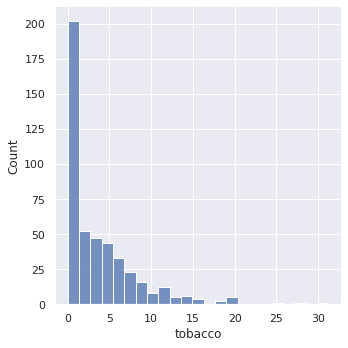

In [49]:
sns.displot(df1, x='tobacco')

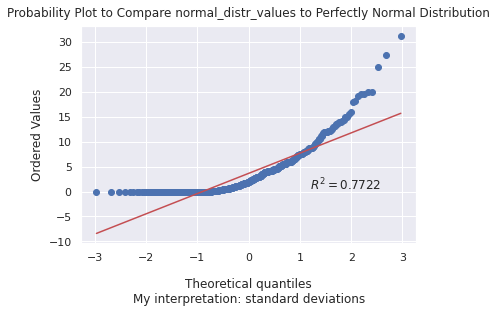

In [50]:
import scipy.stats as stats
stats.probplot(df1.loc[:,'tobacco'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

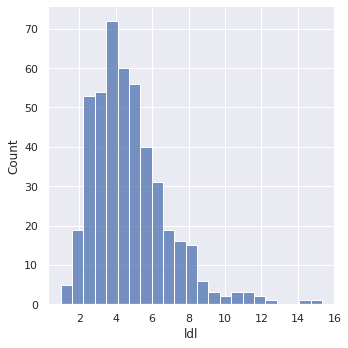

In [51]:
sns.displot(df1, x='ldl')

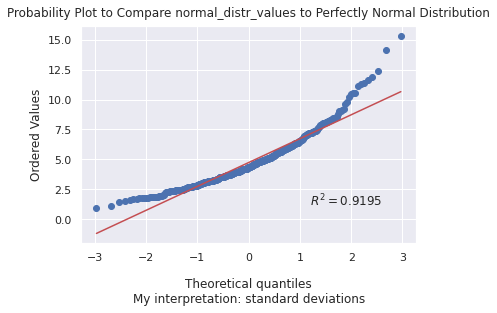

In [52]:
import scipy.stats as stats
stats.probplot(df1.loc[:,'ldl'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

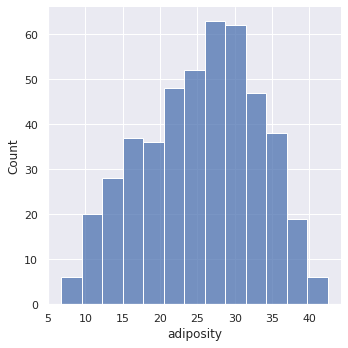

In [53]:
sns.displot(df1, x='adiposity')

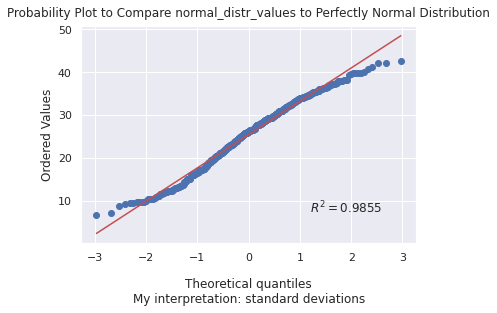

In [54]:
import scipy.stats as stats
stats.probplot(df1.loc[:,'adiposity'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

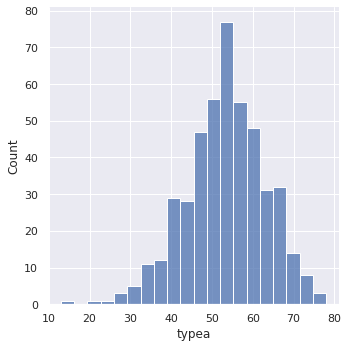

In [55]:
sns.displot(df1, x='typea')

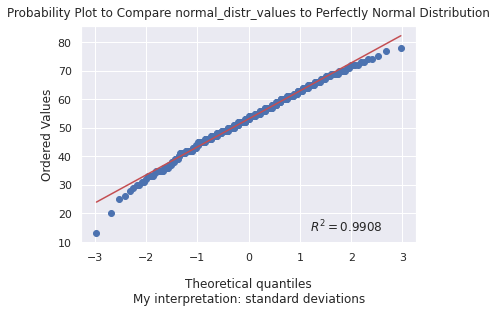

In [56]:
import scipy.stats as stats
stats.probplot(df1.loc[:,'typea'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

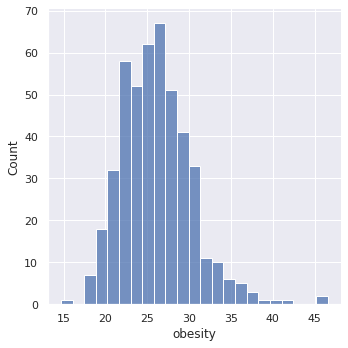

In [57]:
sns.displot(df1, x='obesity')

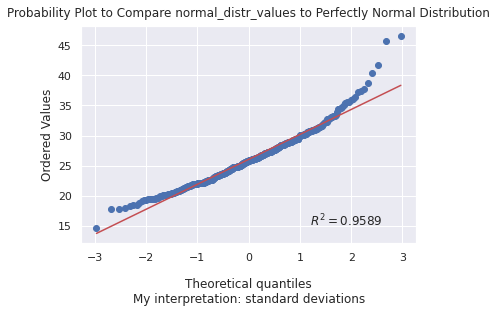

In [58]:
import scipy.stats as stats
stats.probplot(df1.loc[:,'obesity'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

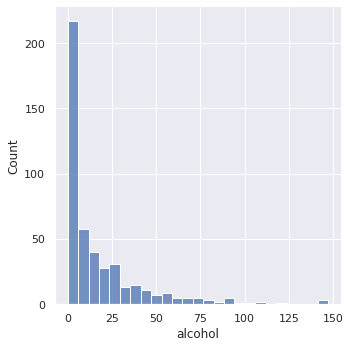

In [59]:
sns.displot(df1, x='alcohol')

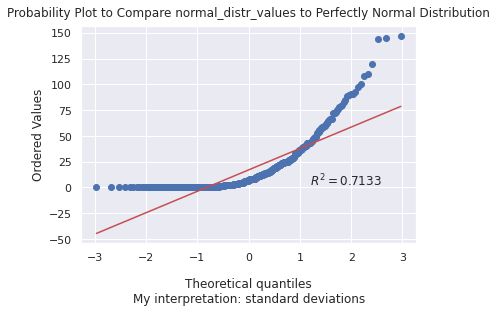

In [60]:
import scipy.stats as stats
stats.probplot(df1.loc[:,'alcohol'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

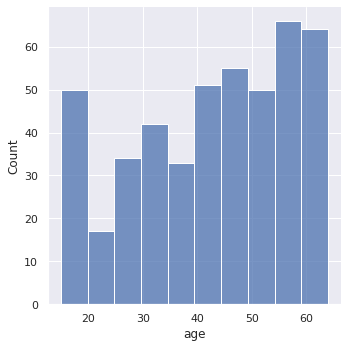

In [61]:
sns.displot(df1, x='age')

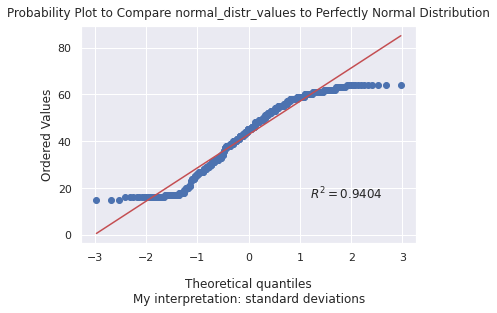

In [62]:
import scipy.stats as stats
stats.probplot(df1.loc[:,'age'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

## Scatter Matrix

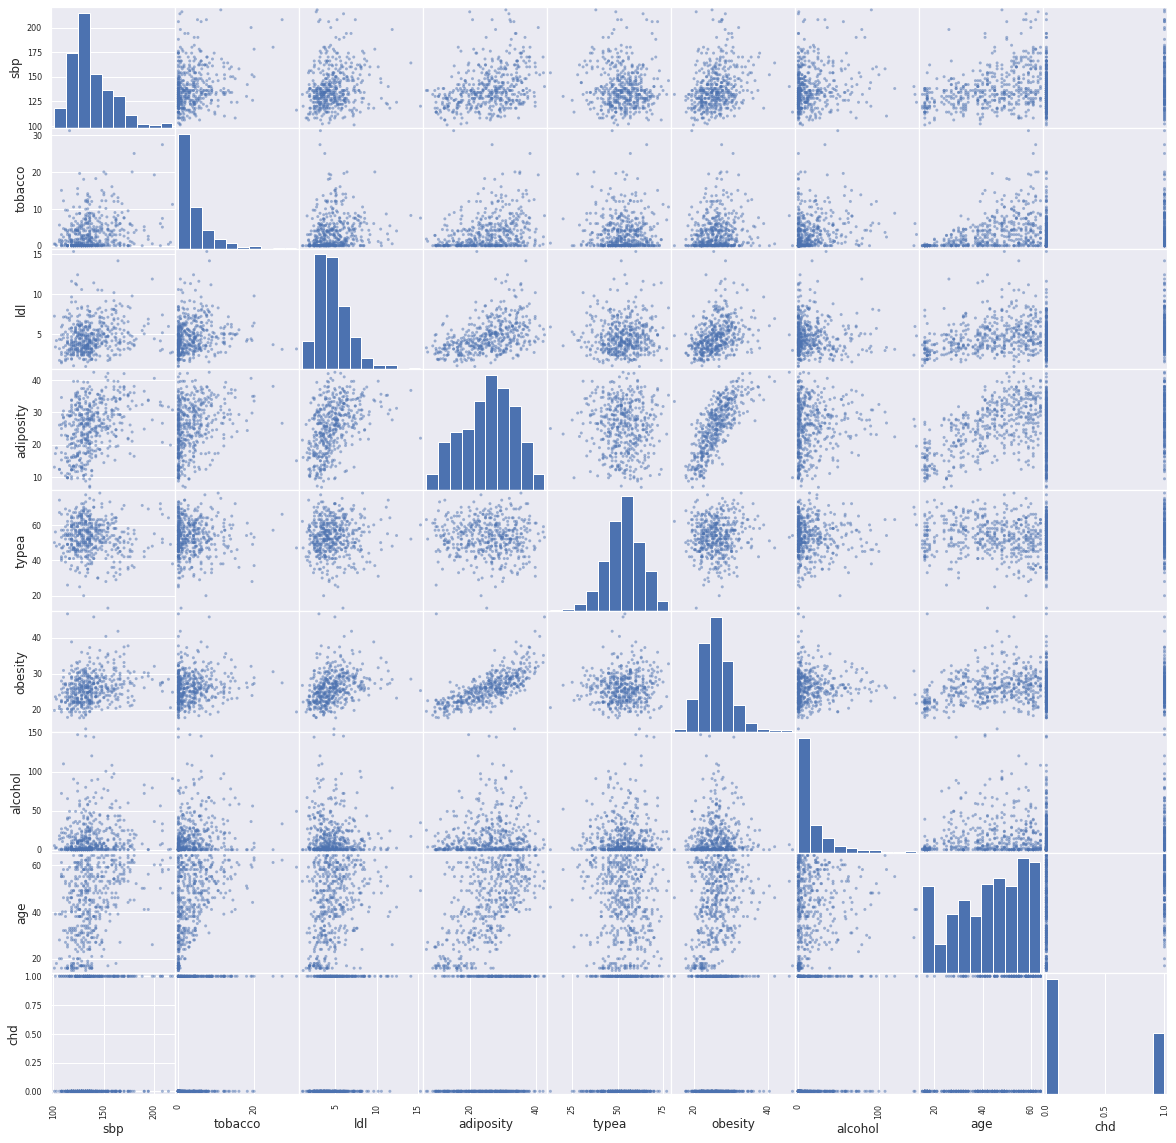

In [63]:
scatter = pd.plotting.scatter_matrix(df1, figsize=(20,20),alpha=0.5, grid=True)

##Correlation

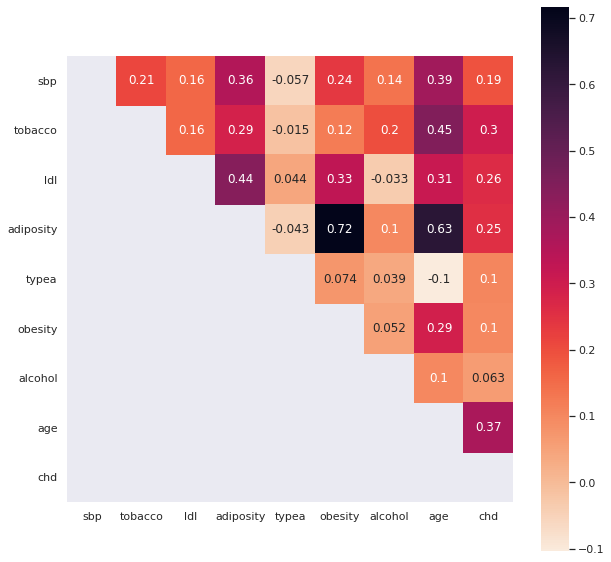

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
matrix = np.tril(df1.corr())
sns.heatmap(df1.corr(), annot = True, ax=ax, cmap="rocket_r", mask=matrix, square=True)

## Checking for Outliers

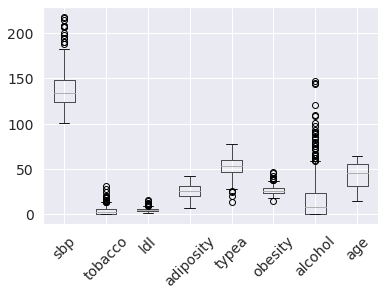

In [65]:
df1.boxplot(column=numeric_cols, rot=45,fontsize='14')

## Outliers values present in sbp,tobacco,ldl,typea,obesity,alcohol

In [66]:
Q1 = df1['sbp'].quantile(0.25)
Q3 = df1['sbp'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['sbp'] >= Q1 - 1.5 * IQR) & (df1['sbp'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
sbp = df1.loc[filter==False,['sbp']].to_numpy()
sbp.resize((1,len(sbp)))
sbp

array([[206, 194, 208, 194, 208, 188, 190, 206, 190, 198, 218, 208, 200,
        216, 214]])

In [67]:
Q1 = df1['tobacco'].quantile(0.25)
Q3 = df1['tobacco'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['tobacco'] >= Q1 - 1.5 * IQR) & (df1['tobacco'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
tob = df1.loc[filter==False,['tobacco']].to_numpy()
tob.resize((1,len(tob)))
tob

array([[14.1 , 14.  , 18.2 , 31.2 , 14.  , 15.5 , 27.4 , 15.  , 20.  ,
        18.  , 15.  , 14.4 , 19.45, 19.6 , 25.01, 19.2 , 20.  , 16.  ,
        13.8 ]])

In [68]:
Q1 = df1['ldl'].quantile(0.25)
Q3 = df1['ldl'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['ldl'] >= Q1 - 1.5 * IQR) & (df1['ldl'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
ldl = df1.loc[filter==False,['ldl']].to_numpy()
ldl.resize((1,len(ldl)))
ldl

array([[15.33, 12.42,  9.65, 11.32, 10.58, 11.17, 10.53, 11.89, 11.41,
        10.49, 10.19,  9.78, 14.16, 11.61]])

In [69]:
Q1 = df1['typea'].quantile(0.25)
Q3 = df1['typea'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['typea'] >= Q1 - 1.5 * IQR) & (df1['typea'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
df1.loc[filter==False,['typea']]

,typea
117,13
218,26
336,20
375,25


In [70]:
Q1 = df1['obesity'].quantile(0.25)
Q3 = df1['obesity'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['obesity'] >= Q1 - 1.5 * IQR) & (df1['obesity'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
ob = df1.loc[filter==False,['obesity']].to_numpy()
ob.resize((1,len(ob)))
ob

array([[38.8 , 46.58, 45.72, 37.41, 40.34, 41.76, 37.24, 37.71, 14.7 ]])

In [71]:
Q1 = df1['alcohol'].quantile(0.25)
Q3 = df1['alcohol'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['alcohol'] >= Q1 - 1.5 * IQR) & (df1['alcohol'] <= Q3 + 1.5 *IQR)
#df1.loc[filter].head(100)
df1.loc[filter==False,['alcohol']]

,alcohol
0,97.20
53,66.65
55,100.32
65,61.71
79,72.00
105,108.00
131,79.82
154,147.19
155,120.03
157,59.79


# Finding underline relationship

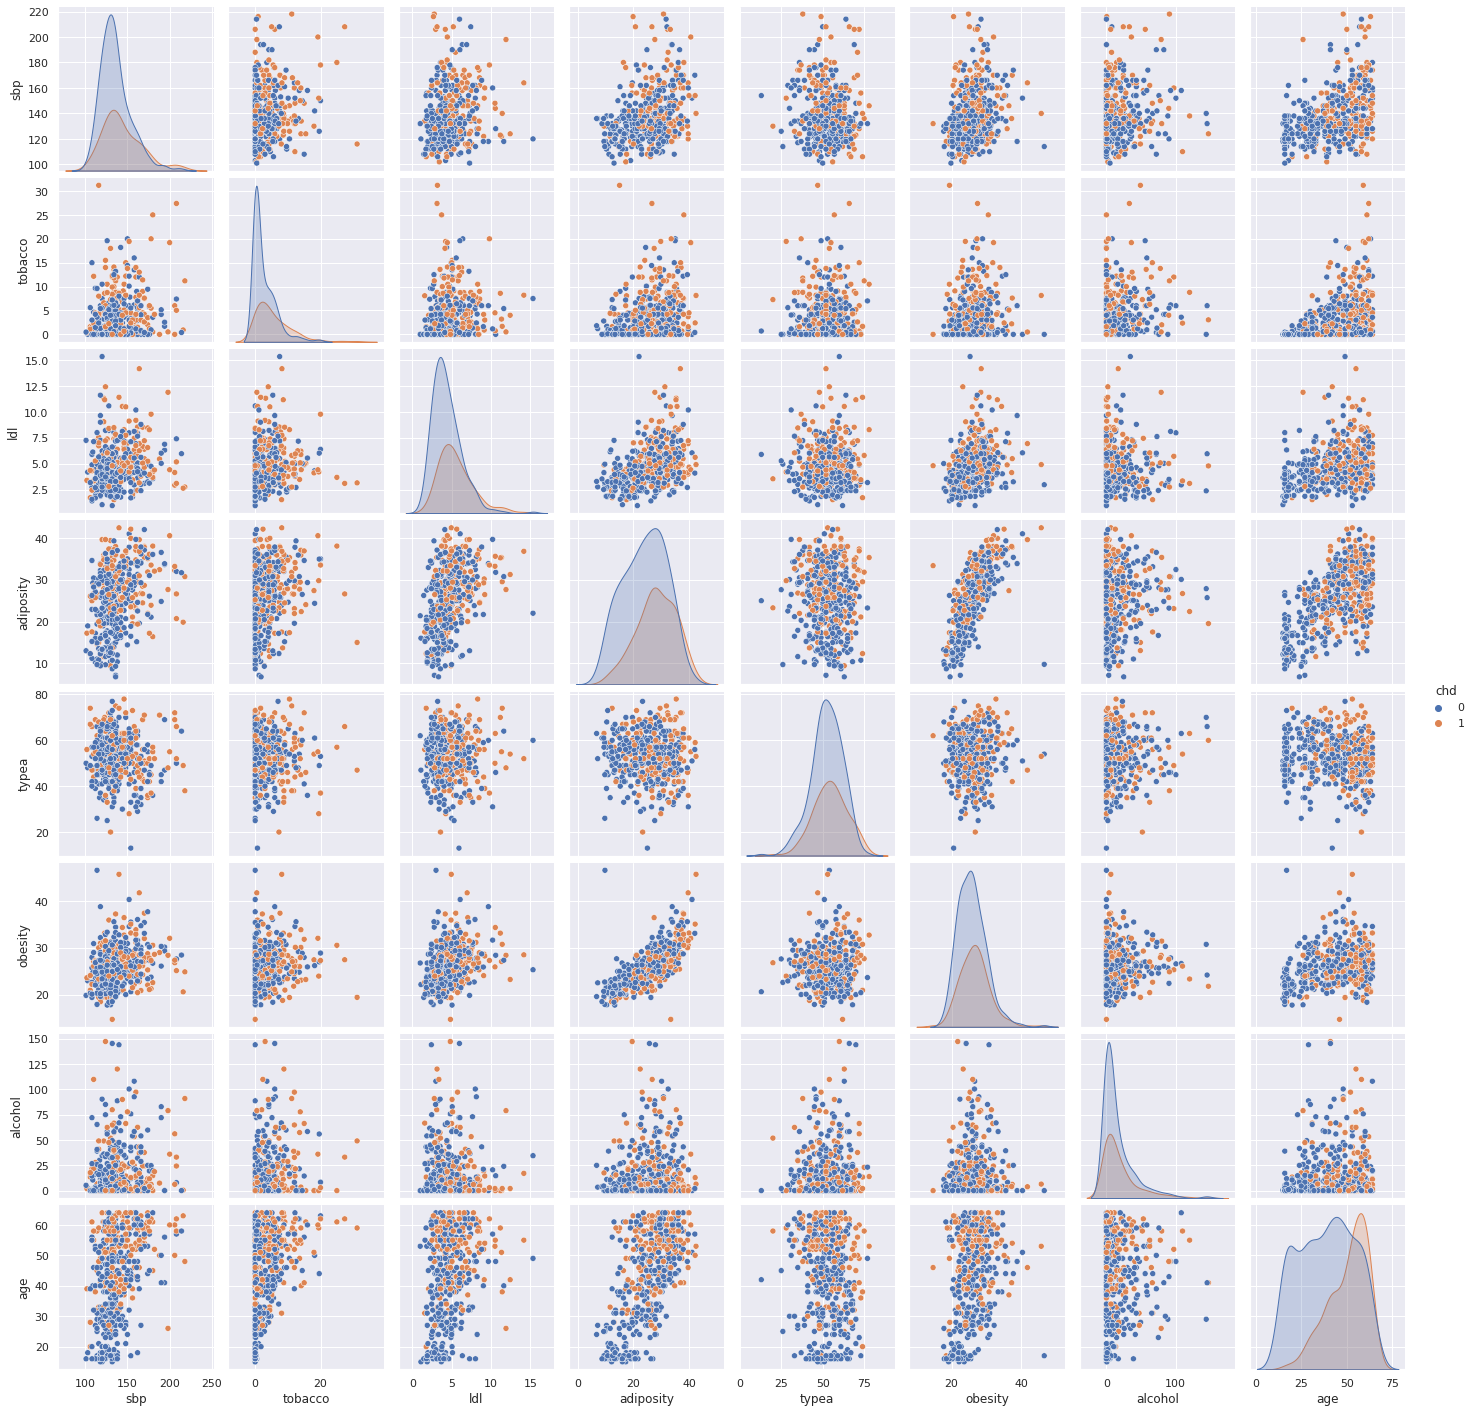

In [72]:
sns.pairplot(df1, hue="chd")

# PCA

## Data

In [74]:
pda_Data = df1.loc[:, ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
chd_data = df1.loc[:, 'chd']

x = pda_Data.values
x = StandardScaler().fit_transform(x)

In [75]:
x

array([[ 1.05856354,  1.82307289,  0.47841217, ..., -0.17678588,
         3.27773797,  0.62933573],
       [ 0.27708929, -0.79023744, -0.15967999, ...,  0.67137291,
        -0.61274463,  1.3831147 ],
       [-0.99280637, -0.77498042, -0.60924492, ...,  0.73551937,
        -0.5411833 ,  0.21818356],
       ...,
       [-1.48122778, -0.13854454, -1.52287687, ..., -1.41457504,
         0.39238531,  0.83491181],
       [-0.99280637,  0.38455344,  3.32082269, ...,  0.31025208,
         0.28320317, -0.1929686 ],
       [-0.3090164 , -0.79241702,  0.0385153 , ..., -2.69512851,
        -0.69698253,  0.21818356]])

## Normalized features

In [76]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [77]:
normalised_features = pd.DataFrame(x,columns=feat_cols)

In [78]:
normalised_features

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760
...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912
460,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969


## PCA with SKLEARN

####It is one of the approuch we can use

In [80]:
#   ........................................
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)

In [82]:
#.............................................
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

In [83]:
# ......................................
principal_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,1.546465,3.058065,1.287760,-0.358979,-0.837978,1.196063,0.500926,0.438345
1,0.851729,-0.698553,-0.393971,-0.262022,0.617005,-0.516002,-1.126654,0.565337
2,0.032527,-1.044151,-0.338407,-0.499566,-0.575849,-1.155402,-0.680579,-0.220195
3,3.012672,0.025543,-0.119813,-0.441394,0.391777,-0.022624,0.392625,-0.094201
4,0.933314,1.889090,1.568492,0.689628,-0.685408,-0.774028,0.351257,-0.189018
...,...,...,...,...,...,...,...,...
457,2.253410,-0.527380,0.110410,-0.834881,3.381830,0.883382,-0.150875,0.038121
458,1.704997,0.413695,-0.251378,-0.886793,1.459250,-0.004426,0.204498,-0.135515
459,-1.858691,1.688678,-1.057006,0.310816,-0.958066,-0.649194,-1.291190,0.597948
460,1.318718,-1.717840,1.169469,1.434223,-1.434831,1.944498,0.259254,-0.260054


In [84]:
#...................................
evector = pd.DataFrame(pca.components_)
evector

,0,1,2,3,4,5,6,7
0,0.333668,0.309586,0.337173,0.527753,-0.024248,0.412804,0.120336,0.463829
1,0.238534,0.458580,-0.363917,-0.187406,-0.282611,-0.391710,0.542817,0.193114
2,-0.070633,0.096235,-0.014412,-0.034407,0.830983,0.120532,0.504180,-0.158429
3,-0.299715,0.584819,0.303958,-0.157912,0.265589,-0.372191,-0.428926,0.240396
4,0.775297,-0.112384,-0.225390,-0.124223,0.353725,-0.159884,-0.402117,0.087579
5,0.275126,-0.253730,0.769669,-0.202311,-0.081221,-0.359273,0.278877,-0.114721
6,0.244957,0.513341,0.115367,-0.158947,-0.157782,0.334580,-0.110836,-0.699127
7,-0.012825,-0.045379,0.069138,-0.760665,-0.043115,0.506476,0.030651,0.393788


In [85]:
#   ............................................
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.35130074 0.14964143 0.13230941 0.10604509 0.09525501 0.08386605
 0.05965302 0.02192925]


## Plot

In [86]:
# .................................
principal_df['chd'] = chd_data

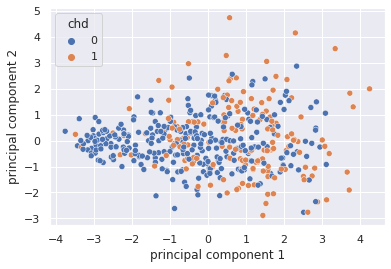

In [87]:
# ...............................
sns.scatterplot(data=principal_df, x="principal component 1", y="principal component 2", hue="chd")

# Manual PCA without SKLEARN

####This is another approuch without sklearn

In [88]:
features = x.T
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.0021692 ,  0.21270693,  0.1586397 ,  0.3572734 , -0.05757894,
         0.23858302,  0.14039948,  0.38961392],
       [ 0.21270693,  1.0021692 ,  0.15925016,  0.28726215, -0.01463957,
         0.12479954,  0.20124899,  0.45130701],
       [ 0.1586397 ,  0.15925016,  1.0021692 ,  0.44138714,  0.04414312,
         0.33122279, -0.03347586,  0.31247559],
       [ 0.3572734 ,  0.28726215,  0.44138714,  1.0021692 , -0.04323723,
         0.7181106 ,  0.10054776,  0.62731224],
       [-0.05757894, -0.01463957,  0.04414312, -0.04323723,  1.0021692 ,
         0.07416664,  0.03958362, -0.10282889],
       [ 0.23858302,  0.12479954,  0.33122279,  0.7181106 ,  0.07416664,
         1.0021692 ,  0.05173154,  0.29241005],
       [ 0.14039948,  0.20124899, -0.03347586,  0.10054776,  0.03958362,
         0.05173154,  1.0021692 ,  0.10134401],
       [ 0.38961392,  0.45130701,  0.31247559,  0.62731224, -0.10282889,
         0.29241005,  0.10134401,  1.0021692 ]])

In [89]:
values, vectors = np.linalg.eig(cov_matrix)
values

array([2.81650227, 0.17581451, 1.19972826, 1.06077135, 0.47825935,
       0.85020098, 0.7636931 , 0.67238375])

# Proper Tables



In [90]:
vectorDF = pd.DataFrame(vectors)
vectorDF

,0,1,2,3,4,5,6,7
0,-0.333668,-0.012825,0.238534,-0.070633,-0.244957,-0.299715,0.775297,-0.275126
1,-0.309586,-0.045379,0.458580,0.096235,-0.513341,0.584819,-0.112384,0.253730
2,-0.337173,0.069138,-0.363917,-0.014412,-0.115367,0.303958,-0.225390,-0.769669
3,-0.527753,-0.760665,-0.187406,-0.034407,0.158947,-0.157912,-0.124223,0.202311
4,0.024248,-0.043115,-0.282611,0.830983,0.157782,0.265589,0.353725,0.081221
5,-0.412804,0.506476,-0.391710,0.120532,-0.334580,-0.372191,-0.159884,0.359273
6,-0.120336,0.030651,0.542817,0.504180,0.110836,-0.428926,-0.402117,-0.278877
7,-0.463829,0.393788,0.193114,-0.158429,0.699127,0.240396,0.087579,0.114721


In [93]:
# Sorting

EigenValues = values[[0,3, 4, 5,7, 6, 2, 1 ]]

EigenVectors = vectorDF[[0,3, 4, 5,7, 6, 2, 1 ]]

## Eigen Values

In [94]:
EigenValues

array([2.81650227, 1.06077135, 0.47825935, 0.85020098, 0.67238375,
       0.7636931 , 1.19972826, 0.17581451])

## Eigen Vectors

In [95]:
EigenVectors

,0,3,4,5,7,6,2,1
0,-0.333668,-0.070633,-0.244957,-0.299715,-0.275126,0.775297,0.238534,-0.012825
1,-0.309586,0.096235,-0.513341,0.584819,0.253730,-0.112384,0.458580,-0.045379
2,-0.337173,-0.014412,-0.115367,0.303958,-0.769669,-0.225390,-0.363917,0.069138
3,-0.527753,-0.034407,0.158947,-0.157912,0.202311,-0.124223,-0.187406,-0.760665
4,0.024248,0.830983,0.157782,0.265589,0.081221,0.353725,-0.282611,-0.043115
5,-0.412804,0.120532,-0.334580,-0.372191,0.359273,-0.159884,-0.391710,0.506476
6,-0.120336,0.504180,0.110836,-0.428926,-0.278877,-0.402117,0.542817,0.030651
7,-0.463829,-0.158429,0.699127,0.240396,0.114721,0.087579,0.193114,0.393788


In [96]:
EigenVectors = EigenVectors.rename(columns={0:'PC1', 3:'PC2', 4:'PC3', 5:'PC4', 8:'PC5', 7:'PC6', 6:'PC7', 2:'PC8', 1:'PC9'}, index=dict(zip(list(range(0,9)),['sbp', 'tobacco', 'ldl', 'adiposity','famhist', 'typea', 'obesity', 'alcohol', 'age'])))
EigenVectors

,PC1,PC2,PC3,PC4,PC6,PC7,PC8,PC9
sbp,-0.333668,-0.070633,-0.244957,-0.299715,-0.275126,0.775297,0.238534,-0.012825
tobacco,-0.309586,0.096235,-0.513341,0.584819,0.253730,-0.112384,0.458580,-0.045379
ldl,-0.337173,-0.014412,-0.115367,0.303958,-0.769669,-0.225390,-0.363917,0.069138
adiposity,-0.527753,-0.034407,0.158947,-0.157912,0.202311,-0.124223,-0.187406,-0.760665
famhist,0.024248,0.830983,0.157782,0.265589,0.081221,0.353725,-0.282611,-0.043115
typea,-0.412804,0.120532,-0.334580,-0.372191,0.359273,-0.159884,-0.391710,0.506476
obesity,-0.120336,0.504180,0.110836,-0.428926,-0.278877,-0.402117,0.542817,0.030651
alcohol,-0.463829,-0.158429,0.699127,0.240396,0.114721,0.087579,0.193114,0.393788


## Explained Variance

In [97]:
explained_variances = []
for i in range(len(EigenValues)):
    explained_variances.append(EigenValues[i] / np.sum(EigenValues))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.35130074351408613, 0.13230941300095403, 0.05965301978167627, 0.10604509010819282, 0.08386604724366092, 0.09525501057480065, 0.1496414307018712, 0.021929245074757936]


## Explained Variance Graph

Text(0, 0.5, 'Principal Components')

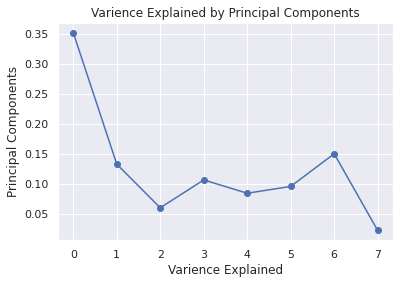

In [99]:
plt.plot(list(range(0,8)),explained_variances,'-o')
plt.title("Varience Explained by Principal Components")
plt.xlabel("Varience Explained")
plt.ylabel("Principal Components")

## Loading

In [ ]:
# Now Loading
# Loading = eigenvectors*eigenvalues^(1/2)

Loading = (EigenValues**(1/2))*(EigenVectors)
Loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
sbp,-0.550476,0.261015,0.129887,0.191058,-0.196693,-0.682202,-0.218998,-0.159872,0.005920
tobacco,-0.513211,0.502215,-0.070762,-0.005212,0.570734,0.142405,0.157558,-0.332097,0.020002
ldl,-0.567770,-0.398602,-0.003223,-0.136507,0.221696,0.187966,-0.643902,-0.047773,-0.030086
adiposity,-0.877862,-0.205501,0.085010,0.131393,-0.108818,0.114257,0.159861,0.117598,0.317056
famhist,-0.331803,0.001469,-0.351404,-0.810948,-0.279514,-0.074842,0.104967,-0.126725,0.012058
typea,0.031152,-0.309079,-0.822645,0.204184,0.293781,-0.289746,0.063570,0.112440,0.016995
obesity,-0.682628,-0.429262,-0.041730,0.297222,-0.259366,0.151593,0.272325,-0.230052,-0.210960
alcohol,-0.206454,0.594776,-0.476722,0.251493,-0.383505,0.331154,-0.226116,0.084943,-0.013852
age,-0.782279,0.211444,0.140481,-0.153035,0.182985,-0.077484,0.118735,0.469634,-0.167943


## Plotting / Direction of the Principal Component

In [100]:
# Ploting
projected_1 = x.dot(EigenVectors.T.iloc[0])
projected_2 = x.dot(EigenVectors.T.iloc[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['chd'] = df1['chd']
res['age'] = df1['age']
res['alcohol'] = df1['alcohol']
res['adiposity'] = df1['adiposity']
res['tobacco'] = df1['tobacco']
res['ldl'] = df1['ldl']
res['famhist'] = df1['famhist']
res

,PC1,PC2,chd,age,alcohol,adiposity,tobacco,ldl,famhist
0,-1.546465,1.287760,1,52,97.20,23.11,12.00,5.73,Present
1,-0.851729,-0.393971,1,63,2.06,28.61,0.01,4.41,Absent
2,-0.032527,-0.338407,0,46,3.81,32.28,0.08,3.48,Present
3,-3.012672,-0.119813,1,58,24.26,38.03,7.50,6.41,Present
4,-0.933314,1.568492,1,49,57.34,27.78,13.60,3.50,Present
...,...,...,...,...,...,...,...,...,...
457,-2.253410,0.110410,0,58,0.00,31.72,0.40,5.98,Absent
458,-1.704997,-0.251378,1,52,18.72,32.10,4.20,4.41,Absent
459,1.858691,-1.057006,0,55,26.64,15.23,3.00,1.59,Absent
460,-1.318718,1.169469,0,40,23.97,30.79,5.40,11.61,Absent


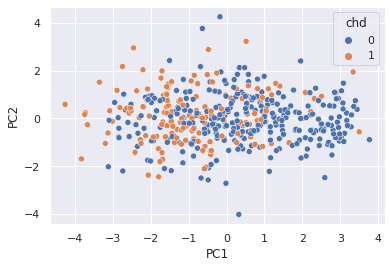

In [101]:
sns.scatterplot(data=res, x='PC1',y='PC2', hue=res['chd'])

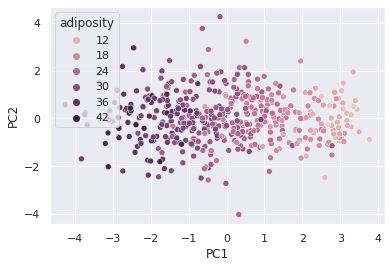

In [102]:
sns.scatterplot(data=res, x='PC1',y='PC2', hue=res['adiposity'])

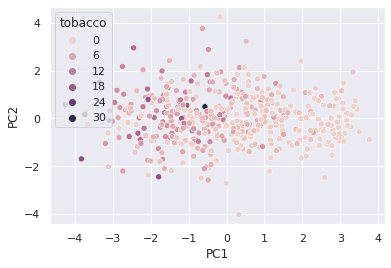

In [103]:
sns.scatterplot(data=res, x='PC1',y='PC2', hue=res['tobacco'])

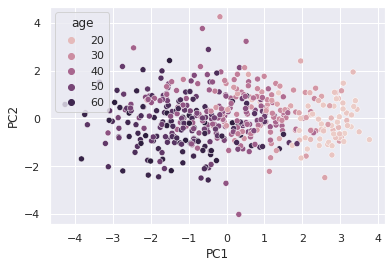

In [104]:
sns.scatterplot(data=res, x='PC1',y='PC2', hue=res['age'])

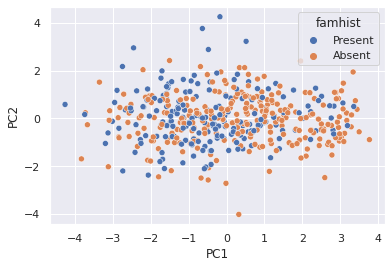

In [105]:
sns.scatterplot(data=res, x='PC1',y='PC2', hue=res['famhist'])

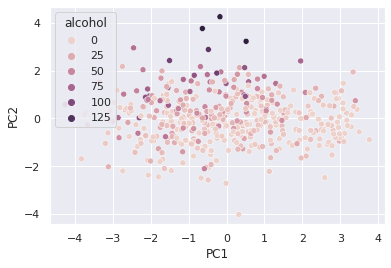

In [106]:
sns.scatterplot(data=res, x='PC1',y='PC2', hue=res['alcohol'])

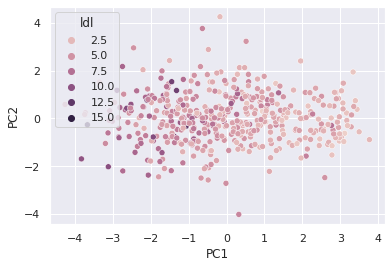

In [107]:
sns.scatterplot(data=res, x='PC1',y='PC2', hue=res['ldl'])

# ** Predicting ldl from other attributes using regression**

## Removing Row.names

In [109]:
df2 = df.copy()

# Handling categorized Attribute 'FAMHIST'

In [110]:
df2['famhist'].replace('Present',1,inplace = True)
df2['famhist'].replace('Absent',0,inplace = True)
df2

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,Positive
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,Positive
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,Negative
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,Positive
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,Positive
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,Negative
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,Positive
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,Negative
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,Negative


# Graphical Exploration

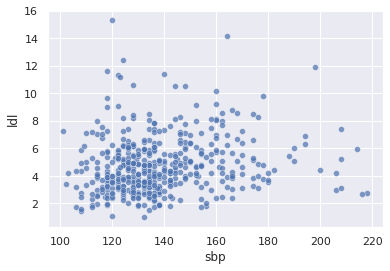

In [111]:
sns.scatterplot(data = df2 , x='sbp',y='ldl', alpha=0.7)

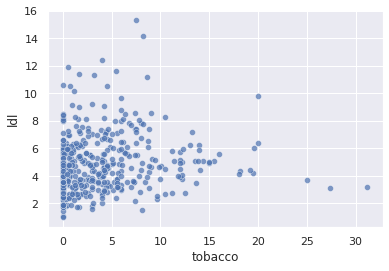

In [112]:
sns.scatterplot(data = df2 , x='tobacco',y='ldl', alpha=0.7)

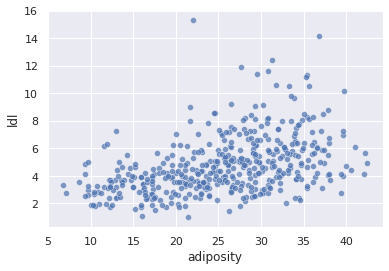

In [113]:
sns.scatterplot(data = df2 , x='adiposity',y='ldl', alpha=0.7)

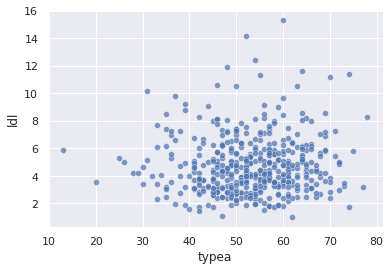

In [114]:
sns.scatterplot(data = df2 , x='typea',y='ldl', alpha=0.7)

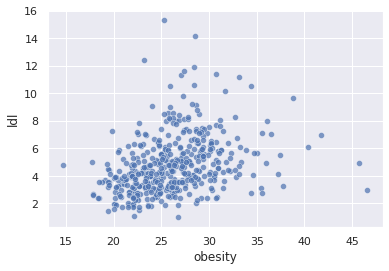

In [115]:
sns.scatterplot(data = df2 , x='obesity',y='ldl', alpha=0.7)

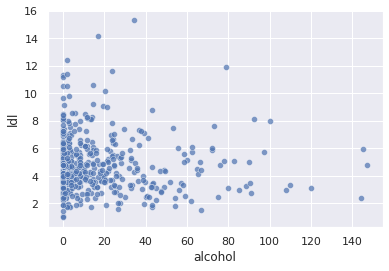

In [116]:
sns.scatterplot(data = df2 , x='alcohol',y='ldl', alpha=0.7)

# Machine Learning Models

# **Regression**

In [125]:
df["famhist"]= df["famhist"].replace("Present",1)
df["famhist"]= df["famhist"].replace("Absent",0)


X = df[["adiposity"]]
y = df["ldl"]
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [126]:

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
alphas = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]

for a in alphas:
 model = LinearRegression().fit(X,y) 
 score = model.score(X, y)
 pred_y = model.predict(X)
 mse = mean_squared_error(y, pred_y) 
 print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))

Alpha:0.000001, R2:0.194, MSE:3.45, RMSE:1.86
Alpha:0.000010, R2:0.194, MSE:3.45, RMSE:1.86
Alpha:0.000100, R2:0.194, MSE:3.45, RMSE:1.86
Alpha:0.001000, R2:0.194, MSE:3.45, RMSE:1.86
Alpha:0.010000, R2:0.194, MSE:3.45, RMSE:1.86
Alpha:0.100000, R2:0.194, MSE:3.45, RMSE:1.86
Alpha:1.000000, R2:0.194, MSE:3.45, RMSE:1.86
Alpha:10.000000, R2:0.194, MSE:3.45, RMSE:1.86
Alpha:100.000000, R2:0.194, MSE:3.45, RMSE:1.86
Alpha:1000.000000, R2:0.194, MSE:3.45, RMSE:1.86


In [127]:




lin_mod=LinearRegression()
lin_mod.fit(train_set_prepared,y_train)
ypred = lin_mod.predict(test_set_prepared)
score = lin_mod.score(test_set_prepared,y_test)
mse = mean_squared_error(y_test,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse,np.sqrt(mse)))

x_ax = range(len(test_set_prepared))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# RidgeCV method
lin_cv=RidgeCV(alphas=alphas, store_cv_values=True)
lin_mod = lin_cv.fit(train_set_prepared,y_train)
print(lin_mod.alpha_)

errors_LinearReg = np.mean(lin_mod.cv_values_, axis=0)

print('errors ==> ', errors_LinearReg)

ypred = lin_mod.predict(test_set_prepared)
score = lin_mod.score(test_set_prepared,y_test)
mse = mean_squared_error(y_test,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse, np.sqrt(mse)))

x_ax = range(len(test_set_prepared))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

NameError: ignored

In [128]:

## BaseLine

from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_set_prepared, y_train)
predicted = dummy_regr.predict(test_set_prepared)

error = metrics.mean_squared_error(y_test, predicted)   

error


NameError: ignored

In [ ]:
from sklearn.neural_network import MLPRegressor
error_rate_ANN = []

for a in alphas:
  mlp = MLPRegressor(
    
              hidden_layer_sizes= [i for i in range(1,15)],
              activation= 'relu',
              solver= 'adam',
              learning_rate= 'constant',
              learning_rate_init= 0.001,
              power_t= 0.5,
              alpha= a
    
              )

  mlp.fit(train_set_prepared,y_train)

  predict_test = mlp.predict(test_set_prepared)
  error = metrics.mean_squared_error(y_test, predict_test)   
  error_rate_ANN.append(error)

error_rate_ANN

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[3.2221520200786813,
 3.197591462064798,
 3.202777305206594,
 2.781139897637091,
 3.17946151588066,
 3.225985528555083,
 3.223679441553297,
 3.2155998299858566,
 3.1926558683261623,
 8.132714992758062]

In [ ]:
#!pip install mlxtend


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-3.6233434092857073 0.01516616874763201


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
d = {
    'i' : [1, 2, 3, 4, 5, 6,7,8,9,10], 'h∗': alphas, 'ANN Error Rate': error_rate_ANN, 'λ': alphas, 'Linear Reg Error Rate': errors_LinearReg, 'Baseline Error Rate': [error for i in range(10)]
}

table1 = pd.DataFrame(d)
table1


,i,h∗,ANN Error Rate,λ,Linear Reg Error Rate,Baseline Error Rate
0,1,0.000001,3.631553,0.000001,3.595168,8.969755
1,2,0.000010,3.371407,0.000010,3.595168,8.969755
2,3,0.000100,3.647715,0.000100,3.595168,8.969755
3,4,0.001000,3.640671,0.001000,3.595168,8.969755
4,5,0.010000,3.156249,0.010000,3.595166,8.969755
5,6,0.100000,3.624168,0.100000,3.595149,8.969755
6,7,1.000000,3.652802,1.000000,3.594992,8.969755
7,8,10.000000,3.644081,10.000000,3.594652,8.969755
8,9,100.000000,3.630909,100.000000,3.632549,8.969755
9,10,1000.000000,8.969755,1000.000000,4.002550,8.969755


In [ ]:

from nested_cv import NestedCV
models_to_run = [mlp,ridge_mod]
models_param_grid = {}
                    

for i,model in enumerate(models_to_run):
    nested_CV_search = NestedCV(model=model, params_grid = models_param_grid,
                                outer_kfolds=5, inner_kfolds=5,
                                cv_options={'sqrt_of_score':True, 'randomized_search_iter':30})
    
    nested_CV_search.fit(X=train_set_prepared,y=y_train)
    model_param_grid = nested_CV_search.best_params

    print(np.mean(nested_CV_search.outer_scores))
 


NameError: ignored

## Classification

In [118]:
from sklearn.model_selection import train_test_split
Xc = df[["famhist", "age", "adiposity"]]
yc = df["chd"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc)

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

num_attribs = ["famhist", "age", "adiposity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),        
    ])

train_set_c = full_pipeline.fit_transform(Xc_train)
test_set_c = full_pipeline.fit_transform(Xc_test)
pd.DataFrame(train_set_c).describe()

,0,1,2
count,3.460000e+02,3.460000e+02,3.460000e+02
mean,5.647377e-17,-1.212903e-16,-1.596347e-16
std,1.001448e+00,1.001448e+00,1.001448e+00
min,-8.748178e-01,-1.951825e+00,-2.147306e+00
25%,-8.748178e-01,-7.656864e-01,-6.902331e-01
50%,-8.748178e-01,1.413606e-01,8.108031e-02
75%,1.143095e+00,8.390891e-01,7.204149e-01
max,1.143095e+00,1.467045e+00,2.257736e+00


In [121]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(train_set_c, yc_train)
predict_lgc = clf.predict(test_set_c)
predict_lgc

array(['Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positi

In [ ]:
# ANN
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
              hidden_layer_sizes=(8,8,8), 
              activation='relu', 
              solver='adam', 
              max_iter=500
              )

mlp.fit(train_set_c, yc_train)

predict_mlpc = mlp.predict(test_set_c)
predict_mlpc

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0])

In [ ]:
# Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier().fit(train_set_c, yc_train)
predict_dtc = classifier.predict(test_set_c)
predict_dtc

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1])

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3).fit(train_set_c, yc_train)

#Predict Output
predict_knnc= model.predict(test_set_c) # 

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB().fit(train_set_c, yc_train)

#Predict Output
predict_nbc = model.predict(test_set_c)




In [ ]:
#baseline
#from sklearn.dummy import DummyClassifier
#dummy_clf = DummyClassifier(strategy="stratified").fit(train_set_prepared, y_train)
#predicted = dummy_clf.predict(test_set_prepared)
#predicted



array([ 2.77,  4.55,  2.42,  7.04,  8.41,  5.62,  5.98,  2.83,  7.04,
        4.82,  4.14,  5.98,  5.32,  4.18,  6.08,  8.07,  4.44,  4.37,
        4.15,  6.17,  2.79,  8.41, 14.16,  8.03,  2.19,  4.77,  5.58,
        4.55,  3.37,  4.82,  3.96,  2.66,  4.9 ,  4.37,  5.98,  4.86,
        3.59,  5.9 ,  4.17,  2.47,  4.71,  4.17,  3.02,  4.15, 11.41,
        3.53, 14.16,  4.44,  3.98,  5.56,  3.08,  3.84, 15.33,  5.5 ,
        3.41,  4.18, 15.33,  3.37,  3.58,  3.74,  3.17,  5.96,  7.22,
        3.57,  1.8 ,  4.59,  3.98,  3.08,  4.63,  4.97,  6.08,  1.82,
        6.03,  2.73,  8.28,  4.37,  4.96,  4.41,  4.9 ,  3.96,  7.46,
        5.38,  3.69,  4.34,  4.34,  5.5 ,  3.95,  5.09,  5.73,  3.17,
        4.17,  3.02,  8.22,  3.51,  2.63,  4.55,  3.3 ,  5.17,  3.24,
        5.58, 10.58,  2.84,  6.14,  8.01,  5.47,  2.66,  2.95,  4.33,
        4.71,  3.51,  3.37,  3.95,  3.14,  3.74,  4.66,  6.03])

In [ ]:

from sklearn.metrics import accuracy_score

C_param_range = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
error_rate = []

for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    
    lr.fit(train_set_c, yc_train)

    y_pred_lr = lr.predict(test_set_c)

    wrong = (yc_test != y_pred_lr)

    count = wrong.shape[0]

    wrong_count = wrong[wrong == True].shape[0]
    
    E = wrong_count/count

    error_rate.append(E)

    print('Error Rate => ', E)

    print( 'Accuracy => ', accuracy_score(yc_test,y_pred_lr))


## lambda = 0.001 gives highest accuracy score


Error Rate =>  0.3017241379310345
Accuracy =>  0.6982758620689655
Error Rate =>  0.3017241379310345
Accuracy =>  0.6982758620689655
Error Rate =>  0.3017241379310345
Accuracy =>  0.6982758620689655
Error Rate =>  0.3017241379310345
Accuracy =>  0.6982758620689655
Error Rate =>  0.29310344827586204
Accuracy =>  0.7068965517241379
Error Rate =>  0.3017241379310345
Accuracy =>  0.6982758620689655
Error Rate =>  0.3103448275862069
Accuracy =>  0.6896551724137931
Error Rate =>  0.3103448275862069
Accuracy =>  0.6896551724137931
Error Rate =>  0.3103448275862069
Accuracy =>  0.6896551724137931
Error Rate =>  0.3103448275862069
Accuracy =>  0.6896551724137931


In [ ]:
param = []
errorRate = []
for i in range(1,11):
  param.append(i)
  model = KNeighborsClassifier(n_neighbors=i).fit(train_set_c, yc_train)
  #Predict Output
  predict_knn= model.predict(test_set_c) # 
  errorRate.append(1 - accuracy_score(yc_test,predict_knn))
  print(accuracy_score(yc_test,predict_knn))
# 2 neighbours gives highest accuracy score


0.6293103448275862
0.7068965517241379
0.7241379310344828
0.7327586206896551
0.7586206896551724
0.7413793103448276
0.7327586206896551
0.7327586206896551
0.7241379310344828
0.7327586206896551


In [ ]:
class Baseline:
  def fit(self, X, y):
    pass
  def predict(self, X):
    return np.zeros((len(X), ),dtype=int)

bl=Baseline()
bl.fit(train_set_c, yc_train)
predict_bl=bl.predict(test_set_c)
predict_bl

errorBase = 1 - accuracy_score(yc_test,predict_bl)

print(accuracy_score(yc_test,predict_bl))

0.6982758620689655


In [ ]:
# Making Table

#C_param_range
#error_rate
#param
#errorRate
#errorBase

d = {
    'i' : [1, 2, 3, 4, 5, 6,7,8,9,10], 'x∗': param, 'KNN Error Rate': errorRate, 'λ': C_param_range, 'Logistic Error Rate': error_rate, 'Baseline Error Rate': [errorBase for i in range(10)]
}

table2 = pd.DataFrame(d)
table2


,i,x∗,KNN Error Rate,λ,Logistic Error Rate,Baseline Error Rate
0,1,1,0.370690,0.000001,0.301724,0.301724
1,2,2,0.293103,0.000010,0.301724,0.301724
2,3,3,0.275862,0.000100,0.301724,0.301724
3,4,4,0.267241,0.001000,0.301724,0.301724
4,5,5,0.241379,0.010000,0.293103,0.301724
5,6,6,0.258621,0.100000,0.301724,0.301724
6,7,7,0.267241,1.000000,0.310345,0.301724
7,8,8,0.267241,10.000000,0.310345,0.301724
8,9,9,0.275862,100.000000,0.310345,0.301724
9,10,10,0.267241,1000.000000,0.310345,0.301724


In [ ]:
Fahad 